In [70]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt



In [3]:
df = pd.read_csv('HousingData.csv')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [6]:
df['CRIM'].fillna(df['CRIM'].mean(), inplace=True)
df['ZN'].fillna(df['ZN'].mean(), inplace=True)
df['INDUS'].fillna(df['INDUS'].mean(), inplace=True)
df['AGE'].fillna(df['AGE'].mean(), inplace=True)
df['LSTAT'].fillna(df['LSTAT'].mean(), inplace=True)
df['CHAS'].fillna(df['CHAS'].mode()[0], inplace=True)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.200000,4.0900,1,296,15.3,396.90,4.980000,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900000,4.9671,2,242,17.8,396.90,9.140000,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.100000,4.9671,2,242,17.8,392.83,4.030000,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.800000,6.0622,3,222,18.7,394.63,2.940000,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200000,6.0622,3,222,18.7,396.90,12.715432,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.100000,2.4786,1,273,21.0,391.99,12.715432,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.700000,2.2875,1,273,21.0,396.90,9.080000,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.000000,2.1675,1,273,21.0,396.90,5.640000,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.300000,2.3889,1,273,21.0,393.45,6.480000,22.0


In [7]:
df['CHAS'].value_counts()

CHAS
0.0    472
1.0     34
Name: count, dtype: int64

<span style="font-size:20px">LinearRegression Model from scratch</span>

In [8]:
class LinearRegression:
    def __init__(self,lr = 0.001 , n_iters = 1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
    def fit(self,X,Y):
        n_samples , n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        for _ in range(self.n_iters):
            Y_pred = np.dot(X,self.weights) + self.bias
            dw = (1/n_samples) * np.dot(X.T,(Y_pred-Y))
            db = (1/n_samples) * np.sum(Y_pred-Y)
            self.weights =  self.weights - self.lr*dw
            self.bias = self.bias - self.lr *db
    def predict(self,X):
        
        Y_pred = np.dot(X,self.weights) + self.bias
        return Y_pred
        

In [9]:
X = df.drop(columns = 'MEDV' , axis = 1)
Y = df['MEDV']
X = (X - X.mean()) / X.std()

In [10]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.421911,0.296150,-1.309714,-0.268126,-0.144075,0.413263,-1.209396e-01,0.140075,-0.981871,-0.665949,-1.457558,0.440616,-1.103054
1,-0.419455,-0.489154,-0.599178,-0.268126,-0.739530,0.194082,3.783412e-01,0.556609,-0.867024,-0.986353,-0.302794,0.440616,-0.509848
2,-0.419457,-0.489154,-0.599178,-0.268126,-0.739530,1.281446,-2.703594e-01,0.556609,-0.867024,-0.986353,-0.302794,0.396035,-1.238522
3,-0.418863,-0.489154,-1.329120,-0.268126,-0.834458,1.015298,-8.279505e-01,1.076671,-0.752178,-1.105022,0.112920,0.415751,-1.393954
4,-0.414570,-0.489154,-1.329120,-0.268126,-0.834458,1.227362,-5.218221e-01,1.076671,-0.752178,-1.105022,0.112920,0.440616,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.415322,-0.489154,0.126286,-0.268126,0.157968,0.438881,2.119143e-02,-0.625178,-0.981871,-0.802418,1.175303,0.386834,0.000000
502,-0.417353,-0.489154,0.126286,-0.268126,0.157968,-0.234316,2.981647e-01,-0.715931,-0.981871,-0.802418,1.175303,0.440616,-0.518404
503,-0.415541,-0.489154,0.126286,-0.268126,0.157968,0.983986,8.193119e-01,-0.772919,-0.981871,-0.802418,1.175303,0.440616,-1.008940
504,-0.409827,-0.489154,0.126286,-0.268126,0.157968,0.724955,7.573574e-01,-0.667776,-0.981871,-0.802418,1.175303,0.402826,-0.889158


In [11]:
Y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

<span style="font-size:20px">Training the model</span>

In [12]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y ,test_size=0.2,random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [99]:
model = LinearRegression(lr = 0.01 , n_iters = 1000)
model.fit(X_train ,Y_train)
lr_pred = model.predict(X_test)

<span style="font-size:20px">RandomForest Model from scratch</span>

In [63]:
from collections import Counter
class Node:
    def __init__(self,feature=None,threshold=None,left=None,right=None,*,value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value
    def is_leaf_Node(self):
        return self.value is not None
    
class DecisionTree:
    def __init__(self,min_samples_split=2,max_depth=100,n_features=None):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_features = n_features
        self.root = None
    def fit(self,X,Y):
        #self.n_features =X.shape[1] if not in self.n_features else  min(X.shape[1],self.n_features)
        #self.n_features = X.shape[1] if not hasattr(self, 'n_features') else min(X.shape[1], self.n_features)
        if not hasattr(self, 'n_features') or self.n_features is None:
            
            self.n_features = X.shape[1]
        else:
            
            self.n_features = min(X.shape[1], self.n_features)
        self.root = self._grow_tree(X,Y)
        
    def _grow_tree(self,X,Y,depth = 0):
        n_sample,n_feats = X.shape
        n_labels = len(np.unique(Y))
        #checking the stopping
        if (depth>=self.max_depth or n_labels==1 or n_sample< self.min_samples_split):
            leaf_value = self._most_common_labels(Y)
            return Node(value = leaf_value)
        feat_indx = np.random.choice(n_feats,self.n_features,replace=False)
        #findig best split
        best_features,best_thresh = self._best_split(X,Y,feat_indx)
        
        #creating child Nodes
        left_idxs , right_idxs = self._split(X[:,best_features],best_thresh)
        left = self._grow_tree(X[left_idxs , :], Y[left_idxs],depth+1)
        right = self._grow_tree(X[right_idxs , :], Y[right_idxs],depth+1)
        return Node(best_features , best_thresh , left, right) 
        
    def _best_split(self,X,Y,feat_indx):
        best_gain = -1
        split_idx,split_threshold = None,None
        
        for feat_indx in feat_indx:
            X_column = X[:,feat_indx]
            threshold = np.unique( X_column)
            
            for thr in threshold:
                #calculating information gain
                gain = self._information_gain(Y,X_column,thr)
                if gain > best_gain :
                    best_gain = gain
                    split_idx = feat_indx
                    split_threshold = thr
                    
        return split_idx,split_threshold
    
    
    def _information_gain(self,Y,X_column,threshold):
        #parent entropy
        parent_entropy = self._entropy(Y)
        
        #create Children
        left_idxs,right_idxs = self._split(X_column,threshold)
        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0
        
        #calculate the weighted avg entropy children
        n = len(Y)
        n_l , n_r = len(left_idxs) , len(right_idxs)
        e_l , e_r = self._entropy(Y[left_idxs]) , self._entropy(Y[right_idxs])
        children_entropy = (n_l/n) * e_l + (n_r/n) * e_r
        
        #calculate the IG 
        information_gain = parent_entropy - children_entropy
        return information_gain 
        
    def _split(self,X_column,split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs,right_idxs
        
    def _entropy(self,Y):
        Y = Y.astype(int)  
        hist = np.bincount(Y)
        ps = hist/len(Y)
        return -np.sum([p* np.log(p) for p in ps if p>0] 
        
    def _most_common_labels(self,Y):
        counter = Counter(Y)
        value = counter.most_common(1)[0][0]
        return value
        
    def predict(self,X):
        return np.array([self._traverse_tree(x,self.root) for x in X])
    
    def _traverse_tree(self,x,node):
        if node.is_leaf_Node():
            return node.value
        
        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x,node.left)
        return self._traverse_tree(x,node.right)
    
    
    def feature_importances(self):
        
        importances = np.zeros(self.n_features)
        self._compute_feature_importances(self.root, importances)
        return importances

    def _compute_feature_importances(self, node, importances):
        if node is None or node.is_leaf_Node():
            return
        importances[node.feature] += 1
        self._compute_feature_importances(node.left, importances)
        self._compute_feature_importances(node.right, importances)

        

In [69]:
class RandomForest:
    def __init__(self , n_trees = 10 , max_depth = 10 , min_samples_split = 2 , n_features = None):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split 
        self.n_features = n_features
        self.trees = []

    def fit(self, X, Y):
        
        X = np.array(X)
        Y = np.array(Y)
        self.trees = []

        for _ in range(self.n_trees):
            tree = DecisionTree(
                max_depth=self.max_depth,
                min_samples_split=self.min_samples_split,
                n_features=self.n_features
            )
            X_sample, Y_sample = self.bootstrap(X, Y)
            tree.fit(X_sample, Y_sample)
            self.trees.append(tree)

        
    def bootstrap(self,X,Y):
        n_samples = X.shape[0]
        idxs = np.random.choice(n_samples , n_samples , replace =True)
        return X[idxs] , Y[idxs]
        
    def _most_common_labels(self,Y):
        
        counter = Counter(Y)
        most_common = counter.most_common(1)[0][0]
        return most_common  
        
        
    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(predictions , 0,1)
        predictions = np.array([self._most_common_labels(pred) for pred in tree_preds])
        return predictions
    
    
    def feature_importances(self):
        importances = np.zeros(self.trees[0].n_features)
        for tree in self.trees:
            importances += tree.feature_importances()
        importances /= np.sum(importances)  
        return importances

        
        

<span style="font-size:20px">Training the model</span>

In [65]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y ,test_size=0.2,random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [100]:
model =RandomForest(n_trees=10,max_depth=5)
model.fit(X_train ,Y_train)
rf_pred = model.predict(X_test)

<span style="font-size:20px">Visualizing Important features</span>

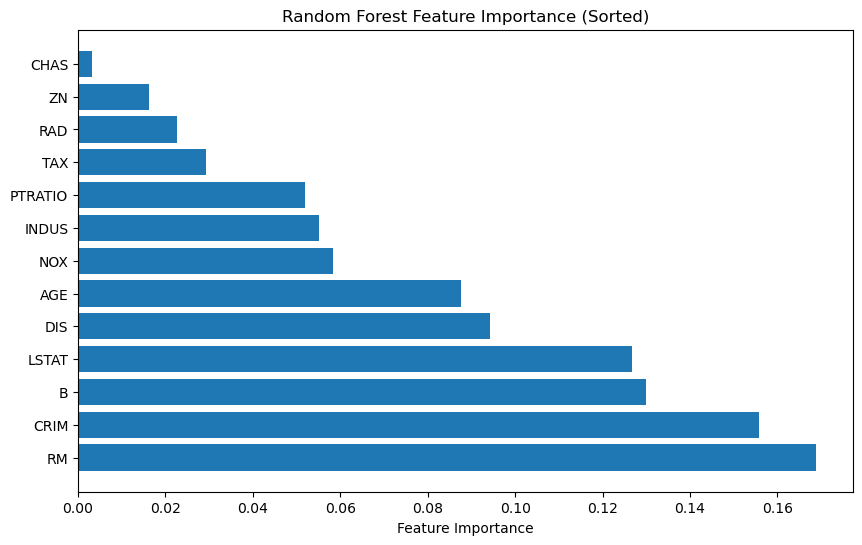

In [71]:

importances = model.feature_importances()

feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
                 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

# Sort by importance
sorted_idx = np.argsort(importances)
sorted_features = np.array(feature_names)[sorted_idx]
sorted_importances = importances[sorted_idx]

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_importances)), sorted_importances, tick_label=sorted_features)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance (Sorted)")
plt.gca().invert_yaxis()
plt.show()


<span style="font-size:20px">XGBoost model from scratch</span>

In [94]:
class XGBoostTree:
    def __init__(self, max_depth=3, min_samples_split=10):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.root = None
        self.feature_importance = {}

    def fit(self, X, g, h):
        self.root = self._build_tree(X, g, h)

    def _build_tree(self, X, g, h, depth=0):
        node = XGBoostTreeNode(depth=depth, max_depth=self.max_depth)

        if depth >= self.max_depth or len(X) < self.min_samples_split:
            node.value = -np.sum(g) / (np.sum(h) + 1e-7)  # Newton step
            return node

        best_gain = -float("inf")
        best_feat, best_thresh = None, None

        for feature in range(X.shape[1]):
            thresholds = np.unique(X[:, feature])
            for t in thresholds:
                left_mask = X[:, feature] < t
                right_mask = ~left_mask
                if np.sum(left_mask) == 0 or np.sum(right_mask) == 0:
                    continue

                G_left, H_left = np.sum(g[left_mask]), np.sum(h[left_mask])
                G_right, H_right = np.sum(g[right_mask]), np.sum(h[right_mask])

                gain = 0.5 * (
                    G_left**2 / (H_left + 1e-7) +
                    G_right**2 / (H_right + 1e-7) - 
                    (G_left + G_right)**2 / (H_left + H_right + 1e-7)
                )

                if gain > best_gain:
                    best_gain = gain
                    best_feat = feature
                    best_thresh = t

        if best_feat is None:
            node.value = -np.sum(g) / (np.sum(h) + 1e-7)
            return node

     
        if best_feat not in self.feature_importance:
            self.feature_importance[best_feat] = 0
        self.feature_importance[best_feat] += best_gain

        node.feature = best_feat
        node.threshold = best_thresh

        left_mask = X[:, best_feat] < best_thresh
        right_mask = ~left_mask

        node.left = self._build_tree(X[left_mask], g[left_mask], h[left_mask], depth + 1)
        node.right = self._build_tree(X[right_mask], g[right_mask], h[right_mask], depth + 1)

        return node
    
    
    def _predict_sample(self, x, node):
        
        
        if node.value is not None:
            return node.value
        if x[node.feature] < node.threshold: 
            return self._predict_sample(x, node.left)
        else:
            return self._predict_sample(x, node.right)
    
    def predict(self, X):
        
        return np.array([self._predict_sample(x, self.root) for x in X])


In [102]:
class XGBoost:
    def __init__(self, n_estimators=10, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.trees = []
        self.feature_importance = {}

    def fit(self, X, Y):
        Y_pred = np.zeros(len(Y))  
        for _ in range(self.n_estimators):
            g = Y_pred - Y             
            h = np.ones_like(Y)        

            tree = XGBoostTree(max_depth=self.max_depth)
            tree.fit(X, g, h)

            update = tree.predict(X)
            Y_pred -= self.learning_rate * update  

            self.trees.append(tree)

     
        self.feature_importance = {}
        for tree in self.trees:
            for feat, gain in tree.feature_importance.items():
                if feat not in self.feature_importance:
                    self.feature_importance[feat] = 0
                self.feature_importance[feat] += gain

    def predict(self, X):
        preds = np.zeros(X.shape[0])
        for tree in self.trees:
            preds -= self.learning_rate * tree.predict(X)
        return preds


<span style="font-size:20px">Training the model</span>

In [96]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y ,test_size=0.2,random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [103]:
model = XGBoost(n_estimators=20, learning_rate=0.1, max_depth=3)
model.fit(X_train ,Y_train)
xg_pred = model.predict(X_test)

<span style="font-size:20px">Visualizing Important features</span>

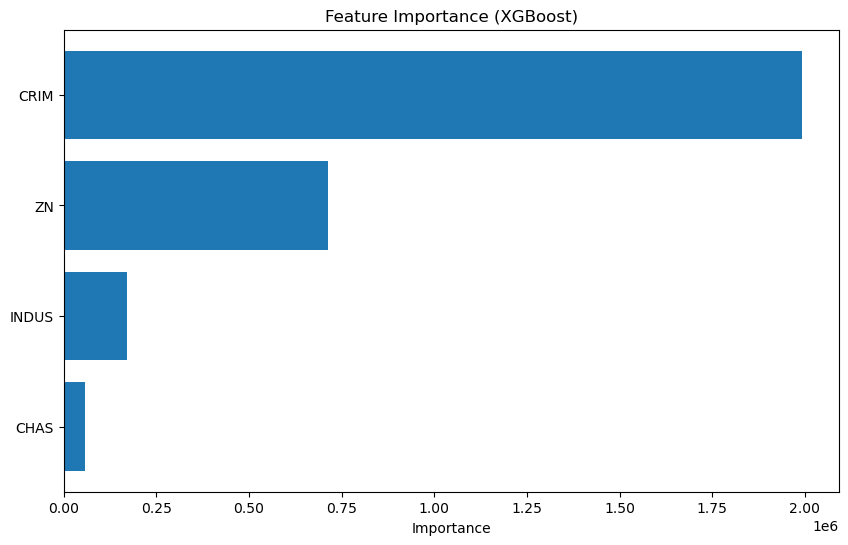

In [108]:
`

feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 
                 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


importances = model.feature_importance
sorted_idx = np.argsort(list(importances.values()))  # Sort by importance
sorted_features = np.array(feature_names)[sorted_idx]
sorted_importances = np.array(list(importances.values()))[sorted_idx]


plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances)
plt.xlabel("Importance")
plt.title("Feature Importance (XGBoost)")
plt.show()


<span style="font-size:20px">Comparing the models using RMSE and R² metrics.</span>

In [105]:
def print_metrics(name, y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{name}:\n  RMSE: {rmse:.4f}\n  R²: {r2:.4f}\n")

print_metrics("Linear Regression", Y_test, lr_pred)
print_metrics("Random Forest", Y_test, rf_pred)
print_metrics("XGBoost (Scratch)", Y_test, xg_pred)


Linear Regression:
  RMSE: 5.0767
  R²: 0.6485

Random Forest:
  RMSE: 3.9229
  R²: 0.7901

XGBoost (Scratch):
  RMSE: 150.8663
  R²: -309.3704



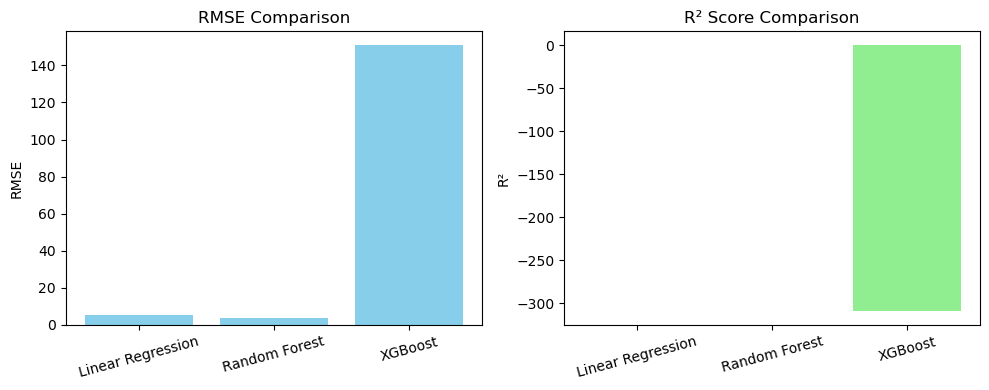

In [107]:


# Collect all metrics
models = ['Linear Regression', 'Random Forest', 'XGBoost']

# Predictions
pred = [lr_pred, rf_pred, xg_pred]

# Calculate metrics
rmses = [np.sqrt(mean_squared_error(Y_test, p)) for p in pred]
r2s = [r2_score(Y_test, p) for p in pred]

# Plot RMSE
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.bar(models, rmses, color='skyblue')
plt.title('RMSE Comparison')
plt.ylabel('RMSE')
plt.xticks(rotation=15)

# Plot R²
plt.subplot(1, 2, 2)
plt.bar(models, r2s, color='lightgreen')
plt.title('R² Score Comparison')
plt.ylabel('R²')
plt.xticks(rotation=15)

plt.tight_layout()
plt.show()
